## AutoEncoders on PointClouds - Modular Code

In [1]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
from general_tools.in_out import create_dir
from tf_lab.point_clouds.point_cloud_ae import FullyConnectedAutoEncoder
from tf_lab.point_clouds.point_cloud_ae import Configuration

In [2]:
#  Import MINST data
mnist = input_data.read_data_sets('/Users/optas/DATA/Images/MNIST/', one_hot=True)
n_examples = mnist.train.num_examples

Extracting /Users/optas/DATA/Images/MNIST/train-images-idx3-ubyte.gz
Extracting /Users/optas/DATA/Images/MNIST/train-labels-idx1-ubyte.gz
Extracting /Users/optas/DATA/Images/MNIST/t10k-images-idx3-ubyte.gz
Extracting /Users/optas/DATA/Images/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
n_input = 28 * 28
training_epochs = 30
basic_conf = Configuration(n_input, training_epochs)
fc_ae = FullyConnectedAutoEncoder(basic_conf)

In [7]:
def train(model, learning_rate=0.001, batch_size=100, training_epochs=100, loss_display_step=1):

    # Training cycle
    for epoch in range(training_epochs):
        epoch_cost = 0.
        n_batches = int(n_examples / batch_size)

        start_time = time.time()
        # Loop over all batches
        for i in range(n_batches):
            batch_xs, _ = mnist.train.next_batch(batch_size)

            # Fit training using batch data
            cost = model.partial_fit(batch_xs)
            # Compute average loss
            epoch_cost += cost
        
        epoch_cost /= (n_batches * batch_size)

        # Display loss per epoch step
        if epoch % loss_display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(epoch_cost))        

In [11]:
x_sample = mnist.test.next_batch(100)[0]
x_reconstruct = fc_ae.reconstruct(x_sample)

plt.figure(figsize=(8, 12))
for i in range(5):
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(x_sample[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(x_reconstruct[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
plt.tight_layout()

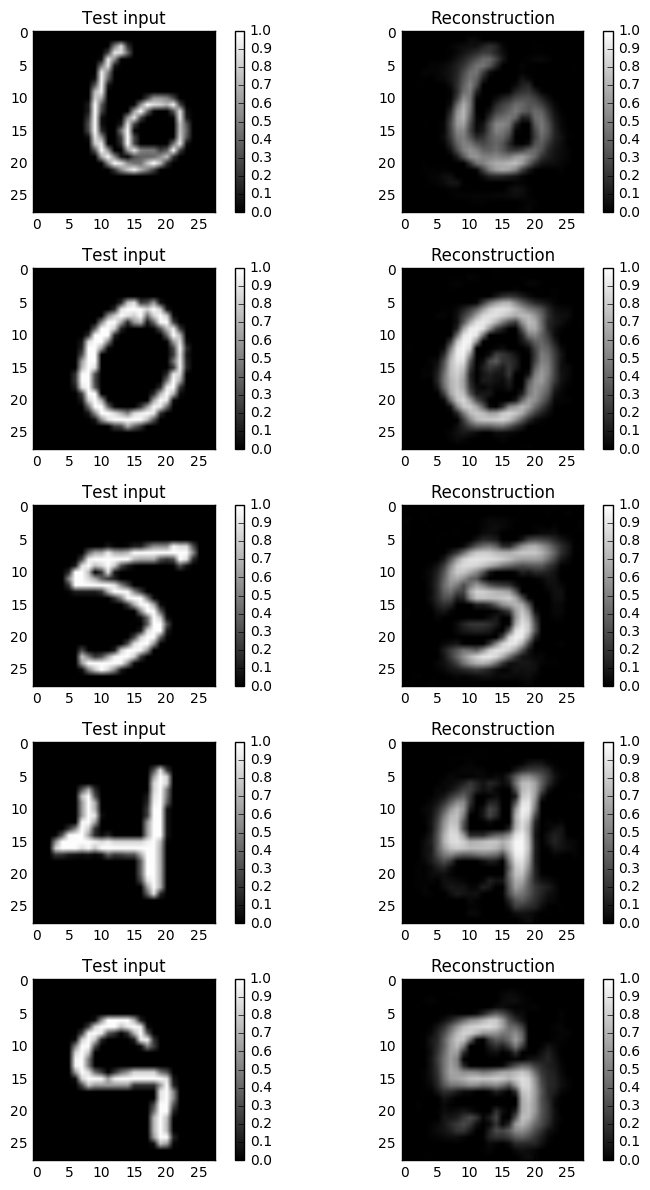

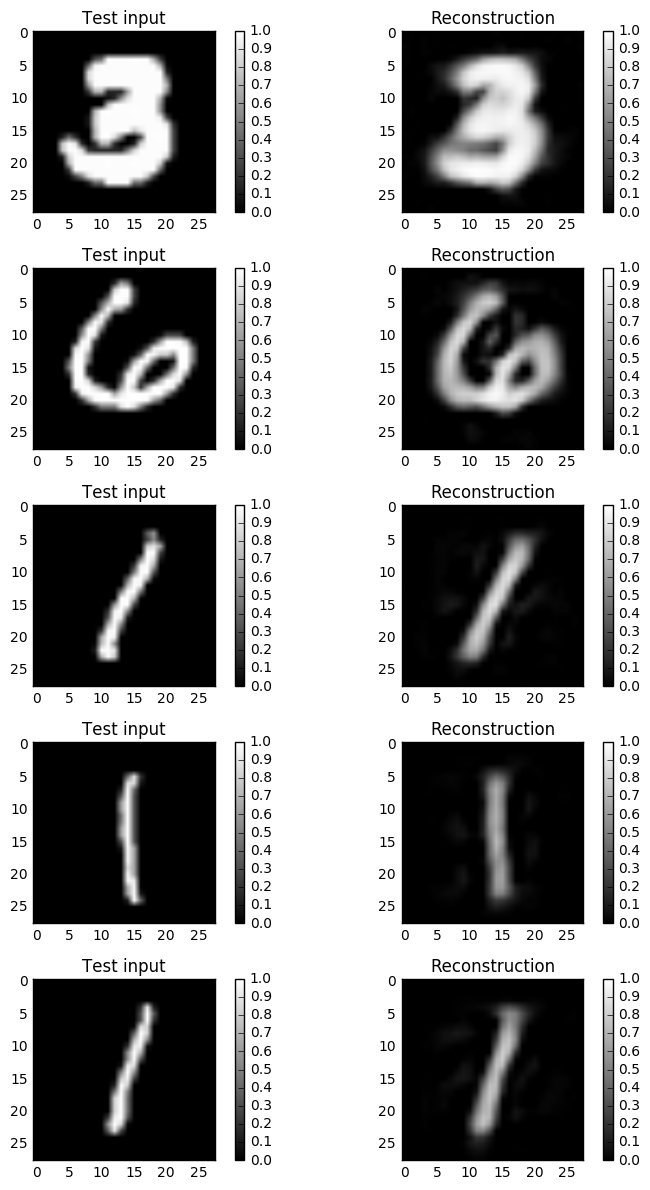

In [14]:
plt.imshow(x_reconstruct[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
plt.show()